# <center> Midterm report: Analyzing the internet memes </center>

# 1 Aims, objectives, and background
## 1.1 Project background
“The Only Constant in Life Is Change” - these words are associated with the ancient Greek philosopher Heraclitus[1]. But the truth of that phrase is still very relevant today, and it can be associated with every aspect of our life, and culture is no exception. Technology made a very big impact on our lives, and the digital era requires appropriate “digital” culture. Internet memes are phenomena that started as a simple idea that grew into something bigger. 
<br>The oxford dictionary defines a meme as “an idea that is passed from one member of society to another, not in the genes but often by people copying it” or “an image, a video, a piece of text, etc. that is passed very quickly from one internet user to another, often with slight changes that make it humorous” for the internet meme[2]. I have been fascinated with this topic, but unfortunately, it doesn't get enough coverage in scientific papers. Even among these scares papers, the majority of works related to social implications like cultural shifts and public taste[3][4]. But there are not many works that tap into the reasons why some images or videos become cult classics, while others struggle to become even relatively popular. Some works focus on the popularity of the other digital content from the independent creators (like YouTube videos or Twitter posts) but not that much is going on for the internet memes[5].
<br>Because of this, I decided to use statistical and data science techniques to analyze the internet meme data and try to find the reasons behind their popularity.

## 1.2 Aims and objectives
Understanding the reasons behind popularity can help us better understand ourselves: what is catching our interest, how do our preferences change with time, what preferences are general for the wide audience and what is better suited for the specific groups? My aim for this research is to analyze the big body of statistical data for internet memes, identify the popular trends among them and determine the factors that can explain their popularity (or lack of it). To analyze the memes I plan to investigate the metadata that comes along with each internet meme and try to find the potential correlation between these metadata pieces and popularity.
<br>To reach these aims I plan completion of the following objectives:
* Discover and acquire the dataset that will be appropriate for the task;
* Decide on methodology and metrics that will be used to analyze the popularity and the underlying factors;
* Explore, verify and format the dataset for the further analysis;
* Inspect and analyze the data: check what data do we have, how it can be used to achieve our goal, and what possible information we can gather from it;
* Make conclusions about the link between the popularity and other factors and lay out the foundation for further analysis in this research field;
It should be noted, that in the scope of this work I will focus on the metadata and correlation between different factors. The semantic analysis is out of the scope of this research, but I will give some implications, that will connect this research with the idea of one focused on the content of memes.

## 1.3 Data relevance and ethics of use
The first challenge for this research is to find suitable data for the analysis. As I stated before, internet memes are mostly just an image with a few lines of text, and such content is not very informative. There is a possibility to use machine learning to analyze different images, read the text content from them, and use NLP methods to carry out sentiment analysis.
<br>One problem with content research is that many images used are copyright protected, and it can be hard to find the original because memes are prime examples of so-called remix culture[6]. Another problem is that the content of the memes can be not very ethical: there are a lot of memes that may be described as discriminating based on race, gender, age, religious beliefs, and so on[7]. Because of this, I decided to analyze not memes themselves but rather metadata that carries some additional but valuable information. This way, I will be able to evade potential problems associated with unethical data and don't need to worry about intellectual property because metadata is not a subject to copyright [8]. For the same reason, I don't experience any risks associated with the use of personal information because these statistics are anonymous.
<br>Because internet memes are folklore in nature, there is no single source that we can trace back to collect the required data. But hopefully, several resources keep track and aggregate internet memes (at least a big chunk of it) that we can use to get related information. I looked up several resources, but they still describe my decision based on the three biggest ones.
<br>First one: “Know your Meme” is a website that serves as a database of internet memes and other popular online materials[9]. It is dedicated to documenting Internet phenomena, storing a big amount of data, categorizing it, and such can provide a solid foundation for this work. The only problem with using this source is that it is designed for viewing purposes, and there is no easy access to the database – no direct download links, no API to get it through.
<br>The second potential data source I analyzed is “Memebase”[10] – it is the same idea as the previous one, but worse. There is almost no metadata besides information about the authorship and origin, and also no reliable way to pull out data. So even if I decide to scrape this web resource, there is not much to work with.
<br>The last source I want to discuss is “Imgflip”[11] – This resource is a little bit different. It is focused on the creation of images, animations, charts, etc. But it also contains a great number of internet memes as templates and has a popularity rating. The problem with this source is the same as with the last one – this resource is more concerned with the content of the memes, and doesn't provide a lot of information to work with (even the popularity score is hidden for the user) in terms of metadata analysis.
<br>Based on this, I decided to collect data from the “Know your Meme” website because this resource had the maximum amount of information about the memes and had a very big database of entries. Initially, I scraped data from this website, but after a little search and analysis, I decided to use the dataset scraped from this website by other people[12]. I compared my dataset to this one: the data scraped by me was fresher but less numerous (I will explain this later). But even this old data contains all information required to analyze the factors of popularity, so I decided to use already scrapped data because, In my case, the quantity is more important than having a little bit more up-to-date data.
<br>The quality and quantity of data directly affect the results of the analysis. A big dataset lowers the chance of the variance in the data and thus increases the accuracy[13]. There are more than 25 hundred entries from the period of more than 10 years in my dataset. It contains memes of different types that have been collected from different sources – this ensures a minimal risk of any type of bias associated with skewed data acquisition. Most of the data is statistical by nature and doesn't have any negative implications, but there is a possibility that some names of the memes, origin places, and some tags are provocative, irresponsible, contain strong words, cover suggestive topics, and such. So I think this dataset is recommended for the mature audience because it can cause a moderate impact on the viewer. In terms of intellectual property – anyone who wants to use this dataset for themselves is required to comply with the terms and conditions of the data source. As for the analysis – it compiles existing data. Theoretically, it can be copyrighted if it creates something new, but this is not the case [14].

# 2. Data acquisition and modification
## 2.1 Preparation
In this work, I used several Python libraries and modules. To make this all possible, I start by importing and setting them up. <br>First of all, install every module that I will be using:

In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install mathplotlib
!{sys.executable} -m pip install wordcloud

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement mathplotlib (from versions: none)
ERROR: No matching distribution found for mathplotlib
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


Now, import the required modules:

In [2]:
from socket import timeout
import requests
import urllib3
from bs4 import BeautifulSoup
import time
import concurrent.futures
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

## 2.2 Preparation
As I stated before, initially, I decided to scrape the internet meme data from the website “Know Your Meme” [14]. Each page of the website consists of 16 links to the different meme entries. So I split the work into three steps: I iterate over several pages, for each page, I collect the links to individual meme pages, and in the end iterate over every single entry page and scrape the required data from here and store this a file. I used a simple script to get this data.
The first one is the function to get the links from the single meme page:

In [3]:
def getLinksFromPage(pageNum):
    
    # Prepare links to scrape the data
    url = 'https://knowyourmeme.com'
    all = '/memes/popular/page/'

    # Prepare html pool manager, header and make a request
    http = urllib3.PoolManager()
    header = {
        'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'}
    response = http.request(
        'GET', url + all + str(pageNum), headers=header, timeout=3)

    # Stop if there are no more pages
    if(response.status != 200):
        print('Error! Can not access specidied page.')
        return

    # Make a pause to prevent ip ban
    time.sleep(1)

    # Add the list of links to the result
    return [url+a.get('href') for a in BeautifulSoup(response.data, 'lxml').select('td[class *= "entry"] > a')]


The next one expands upon the previous one. It helps to collect links from all pages in the specified range:

In [4]:
def getLinks(startPage, numOfPages):
    
    print('Links extraction started...')

    # Parralel async link extraction
    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        res = executor.map(
            lambda x: getLinksFromPage(x), range(startPage, startPage + numOfPages))

        print('Links extraction finished.')

        # Flatten the result list
        return [link for links in list(res) for link in links]

This function is designed to scrape the data from the link to the individual meme page:

In [5]:
def linkToStr(link):
    # Helper function to create CSV token from the string
    def strToToken(strData):
        return "\"" + strData.replace('\"', '\'') + "\"" if strData else "\"NoData\""

    # Helper function to try and extract the text from the bf html element
    def getText(elem):
        return elem.text if elem else None
    
    # Prepare html pool manager and make a request
    http = urllib3.PoolManager()
    page = http.request('GET', link, timeout=3)

    # Stop if page is not accessible
    if(page.status != 200):
        print('Request failed, skipping...')
        return

    # Create soup from the page data and scrape data (sometimes in 2 steps to prevent errors)
    soup = BeautifulSoup(page.data, 'lxml')

    title = soup.select_one('section[class *= "info"] > h1')
    status = soup.select_one('div[class = "tooltip-popup"] > span')
    type = soup.select_one('div[class = "detail"] > span > a[href *= "types"]')
    year = soup.select_one('div[class = "detail"] > span > a[href *= "year"]')

    place = status.find_next('span') if status else None
    place = status.find_next('span').find_next('span') if place else None

    date = soup.select_one('abbr[class = "timeago"]')
    date = date.get('title') if date else None

    views = soup.select_one('div[class = "stat-item"] > div[class = "views"]')
    views = views.find_next_sibling('span') if views else None

    videos = soup.select_one('a[class = "stat-item"] > div[class="videos"]')
    videos = videos.find_next('span') if videos else None

    photos = soup.select_one('a[class = "stat-item"] > div[class="photos"]')
    photos = photos.find_next('span') if photos else None

    comments = soup.select_one(
        'a[class = "stat-item"] > div[class="comments"]')
    comments = comments.find_next('span') if comments else None

    tags = soup.select_one('div[class = "tags"]')
    tags = ','.join(list(map(lambda el: el.text.replace('\"', '\''),
                             soup.select_one('div[class = "tags"]').findChildren('a')))) if tags else None

    about = soup.select_one('h2[id *= "about"]') if soup.select_one('h2[id *= "about"]') else soup.select_one(
        'h1[id *= "about"]')
    about = about.find_next('p') if about else None

    # Make a pause to prevent ip ban
    time.sleep(1)

    return ", ".join([strToToken(getText(title)),
                      strToToken(getText(status)).replace('\n', ''),
                      strToToken(getText(type)).replace(',', ''),
                      strToToken(getText(year)),
                      strToToken(getText(place)).replace('\n', ''),
                      strToToken(date),
                      strToToken(getText(views)).replace(',', ''),
                      strToToken(getText(videos)),
                      strToToken(getText(photos)),
                      strToToken(getText(comments)),
                      strToToken(tags),
                      strToToken(getText(about))])

To scrape the data from several pages at once, I used this function:

In [6]:
def linksToStr(links):

    print('Data scraping started...')

    # Parrallel async scraping from all links
    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        res = executor.map(
            linkToStr, links)

    print('Data scraping finished.')

    return "\n".join(list(res))

The final function is the one that stores all data scraped (to the CSV file) for the future use:

In [7]:
def saveMemes(startPage, numOfPages):
    # Check argument
    if not (isinstance(numOfPages, int) and numOfPages > 0):
        print('Error! Wrong page number.')
        return

    # Time and write the data to the file
    t0 = time.time()

    with open('memes.csv', 'a+', encoding="utf-8") as f:
        # Save the memes to the file
        f.write(linksToStr(getLinks(startPage, numOfPages)) + "\n")
        f.close()

    t1 = time.time()
    print(f"Operation took {round(t1-t0,2)} seconds")

    return "All done, dataset created"

## 2.3 Web scraping the data
Now, let me scrape some data to demonstrate the concept in the work. I tested on the first page of the popular memes page (https://knowyourmeme.com/memes/popular/page/1).
<br>**For some reason, this code doesn't work from the Coursera lab environment but does work from my IDE**

In [8]:
#saveMemes(1,1)

## 2.4 Alternate source
I was able to get the data, but the problem arose when I modified it to increase the performance of the data scraping scripts I used (I increased the number of threads and lowered the sleep timeouts to mere seconds). The “DDOS protection” of the website blocked my IP address several times for suspicion of malevolent activity. 

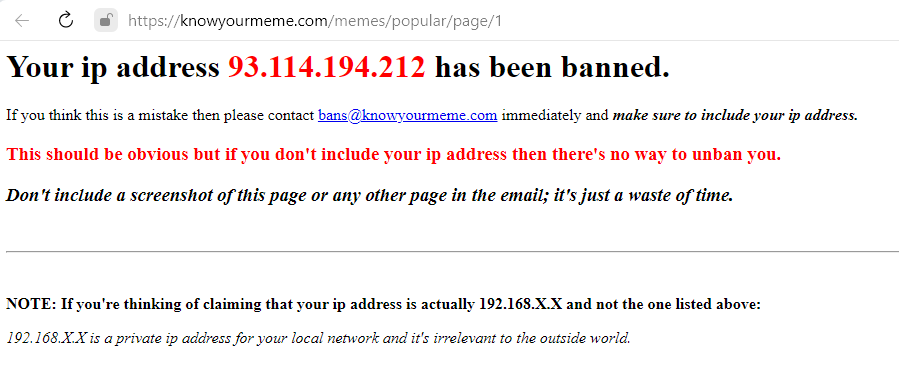

So I was left with 2 options: to collect data in small portions over a long time frame or find another solution. I started with option one and tried to find some other way to get access to their data other than scraping. Luckily, I was able to find that someone already scrapped a great amount of meme data from this site and put it on the “Kaggle” website [15]. The only downside is that this dataset is a bit outdated (2020), but because I aim to find a possible correlation between factors and analyze the effect rather than trends and preferences, it is good enough.

## 2.5 Data cleaning and modification
To make the dataset satisfy the size requirement (10 MB limit) I dropped two last columns (origin,other_text) that contain text explanations of origin and references. This information adds a lot of weight (in megabytes) to the dataset, and is not likely affecting the popularity of the meme itself. The data is stored in the CSV format, so I use the “Pandas” library to read it, transform it into the data frame and drop the last two columns.

In [9]:
#df = pd.read_csv('dataset.csv')
#df = df.iloc[:, :-2]
#df.to_csv('new_file.csv', index=False)

**IMPORTANT: The file attached to this report represents the data right after this truncation but before any additional modifications!**
<br>Now, let's load this dataset file, read it as a dataset and check our data.

In [10]:
df = pd.read_csv('new_file.csv')
df.head()

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about
0,Future Gamer,Submission,Character,2020,OnlineCasion.ca,2020-04-06T14:32:36-04:00,1177,0,8,22,"gamer, video games, science, onlinecasino.ca",Future Gamer is a model of what researchers at...
1,Future Gamer,Submission,Character,2020,OnlineCasion.ca,2020-04-06T14:32:36-04:00,1195,0,8,22,"gamer, video games, science, onlinecasino.ca",Future Gamer is a model of what researchers at...
2,Cooking Mama Cookstar Cryptomining Rumor,Submission,Controversy,2020,4chan,2020-04-06T17:04:33-04:00,3128,0,23,14,"cooking mama, crypto, cryptocurrency, bitcoin,...",Cooking Mama: Cookstar Cryptomining Rumor refe...
3,UNRAVEL / Donny's Theme,Submission,Song,2019,iFunny,2020-04-06T16:49:52-04:00,591,13,3,2,"tokyo ghoul, unravel, tk, tk from ling tosite ...","""UNRAVEL"" is a song by Japanese musician TK th..."
4,Sloof,Submission,Advertisement,2020,April Fools' Day 2020,2020-04-05T09:44:30-04:00,2202,0,14,3,"sloof co, comics, webcomics, artists, ad, adve...",Sloof refers to a series of webcomics featurin...


The first thing that catches my eye is duplicate data in the first two rows. I experienced the same problem while scrapping some data. As I understand it, this happens when you scrape the data in small portions in different periods. So these duplicate entries are just “ghosts” that represent the same meme page with the data from different periods. To prove this I check the data from the first two entries. The only difference is the views count (and the difference is not that significant).
<br>Next, I remove duplicate entries and check that the data frame has been cleared:

In [11]:
df = df.drop_duplicates(subset=['name'], keep='first')
df = df.reset_index(drop=True)
df.head()

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about
0,Future Gamer,Submission,Character,2020,OnlineCasion.ca,2020-04-06T14:32:36-04:00,1177,0,8,22,"gamer, video games, science, onlinecasino.ca",Future Gamer is a model of what researchers at...
1,Cooking Mama Cookstar Cryptomining Rumor,Submission,Controversy,2020,4chan,2020-04-06T17:04:33-04:00,3128,0,23,14,"cooking mama, crypto, cryptocurrency, bitcoin,...",Cooking Mama: Cookstar Cryptomining Rumor refe...
2,UNRAVEL / Donny's Theme,Submission,Song,2019,iFunny,2020-04-06T16:49:52-04:00,591,13,3,2,"tokyo ghoul, unravel, tk, tk from ling tosite ...","""UNRAVEL"" is a song by Japanese musician TK th..."
3,Sloof,Submission,Advertisement,2020,April Fools' Day 2020,2020-04-05T09:44:30-04:00,2202,0,14,3,"sloof co, comics, webcomics, artists, ad, adve...",Sloof refers to a series of webcomics featurin...
4,Full House Intro Parodies,Submission,Parody,2010,YouTube,2020-04-05T09:47:26-04:00,1369,0,0,0,"theme song, everywhere you look, sitcom, intro...",Full House Intro Parodies refer to videos in w...


After rows have been cleaned up, I move to the individual columns and check the data types. Let us check columns up using the data types property of the data frame:

In [12]:
print(df.dtypes)

name            object
status          object
type            object
origin_year     object
origin_place    object
date_added      object
views            int64
videos           int64
photos           int64
comments         int64
tags            object
about           object
dtype: object


The first column – 'name' contains the names of the memes and stores data as Pandas 'object' data type (basically python “string”). I don't modify this column, because there is no real suitable alternative to this datatype representation. Besides, we don't use the names to calculate the correlation or categorize our data (each name is unique), so no modification here. The next column – 'status' describes the state of recognition of the meme. There are 3 states of the memes in the “Know your meme” database: “submission” - represents the new meme entry that is currently being evaluated, and “Deadpool” is the status of the rejected meme (because the entry is incomplete or not very noticeable) and “confirmed” is the approved meme status. This column is also the 'object' data type, but here it requires modification because I plan to measure if memes status correlates with its popularity (in terms of view count). To do this, I create a category type and change the status column datatype to this category:

In [13]:
status_type = pd.CategoricalDtype(categories=['Submission', 'Deadpool', 'Confirmed'], ordered=False)
df['status'] = df['status'].astype(status_type)

The third column - “type” is the tag that helps identify the main idea of the meme. But the difference is, that there are no real predefined categories, so the number of tags is not limited to the few available options, and some entries don't even have a type. But even in this case, because there are some repeating values it is much better to modify the data type. This way I can save some memory space and lower the time required to analyze this column. First of all, I change all 'missing' values to the 'Other' tag, then create a category, and after that modify the column data type.

In [14]:
df['type'] = df['type'].fillna('Other')
memeType_type = pd.CategoricalDtype(categories=df['type'].unique(), ordered=True)
df['type'] = df['type'].astype(memeType_type)

The next column - “origin_year” holds the year that the meme originated. The default data type for this column is also 'object', and we have several options to change it. First of all, because the year is a number, I can cast it to an integer (int64). It can reduce the size required to store this data and help with some mathematical operations, but the thing is – we don't need it (we don't add years together or multiple them). It can be modified to the date type, but a better option is, again, to change this column to the category type, because it will allow us to utilize resources the best way. But another problem with this column is that there are many invalid or suspicious values. So to deal with it, I decided to leave only memes that originated in the period of the century (starting from 2020, because this dataset is a little bit outdated). All origin year values higher than 2020 or lower than 1920 is be set to 'Unknown'. Then I create the categorical type, and change the column type to this category:

In [15]:
df['origin_year'] = df['origin_year'].map(lambda val: val if val != 'Unknown' and int(val) >= 1920 and int(val) <= 2020 else 'Unknown')
year_type = pd.CategoricalDtype(categories=sorted(df['origin_year'].unique()), ordered=True)
df['origin_year'] = df['origin_year'].astype(year_type)

The “Origin_place” column is similar to the previous one, but only stores string values representing the source of the meme. Some of these tags are repetitive, others are not. To gain an advantage of using the categorical type (save space and calculate faster) I decided to change origin places that only show once to “Other”.

In [16]:
# Create the list of all popular origin places (show up more than once)
popular_origin = df['origin_place'].value_counts().gt(1)
popular_origin = popular_origin.loc[popular_origin == True].index.to_list()

# Change all unique values (show up only once) to 'Other'
df['origin_place'] = df['origin_place'].map(lambda val: val if val in popular_origin else 'Other')

# Create type and change column type
origin_type = pd.CategoricalDtype(categories=df['origin_place'].unique(), ordered=True)
df['origin_place'] = df['origin_place'].astype(origin_type)

The next column - “Date_added” contains the date of the meme submission in a string (JS date-time format). First of all, I need to change the format from the string date to the pandas date-time.

In [17]:
df['date_added'] = pd.to_datetime(df['date_added'], utc=True, format="")

Because type casting finished successfully – it means that there are no “wrong” values (like out-of-range day, month, hours, etc.) in there. All I need to check is that all years look realistic. I use this script to check and confirm my assumption. So I don't need to remove or change column values.

In [18]:
df['date_added'].groupby(df['date_added'].dt.year).count()

date_added
2009      93
2010     861
2011    1447
2012    2105
2013     879
2014    1507
2015    2110
2016    2525
2017    3914
2018    1034
2019    1153
2020     563
Name: date_added, dtype: int64

The “views” column shows how many times the meme page has been opened, while “videos”, “photos” and “comments” show additional user content associated with certain memes. All these columns store data as integers (output of the Cell 12), so we don't need to modify the column datatype, but check that there are no negative values:

In [19]:
df[["views", "videos", "photos", "comments"]].sort_values(["views", "videos", "photos", "comments"])

,views,videos,photos,comments
4770,2,8,0,0
4767,4,2,0,0
4768,8,0,0,0
9964,24,4,0,0
4774,39,0,6,0
...,...,...,...,...
17909,11520485,3,60,70
11901,11934097,44,166,424
16604,11966701,50,1291,483
11147,12322090,59,1645,918


Everything is fine, all values are valid and ready for analysis.
<br>The “tags” column contains the list of tags in the string form. The string data type is okay, but in the current form, it recognizes the string as a single value. Now I need to separate each string into the list of individual tags, but before that, I also switch all possible 'NaN' values to the single 'none...' tag (I use the existing one) :

In [20]:
df['tags'] = df['tags'].fillna('none...')
df['tags'] = df['tags'].map(lambda str: str.split(', '))

Now, I can access every single tag in every row, which I will do later. The last column - “about” contains the information from the aforementioned section of the meme page. This data is stored as a single long string, we don't need to modify the datatype, only check the modify invalid values – switch all 'NaN' values and change invalid values (line-breakers).

In [21]:
df['about'] = df['about'].fillna('No data...')
df['about'] = df['about'].map(lambda str: 'No data...' if '\r\n' in str else str)

# 3. Exploratory analysis
Let's start the analysis by checking the dataset and analyzing how the different factors affect the main metric - views. I want to start by visualizing the whole dataset in terms of popularity (views):

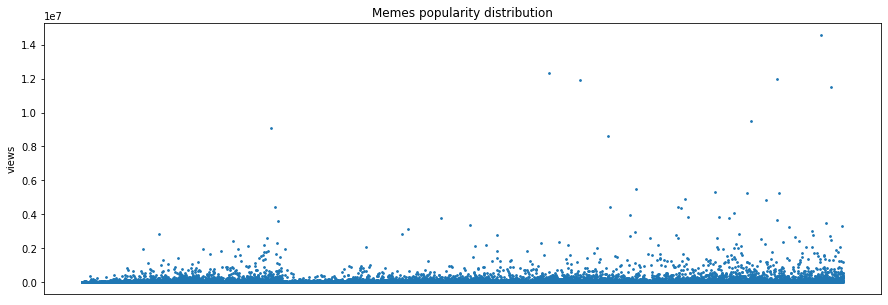

In [22]:
# Set the graph size and plot it
plt.rcParams['figure.figsize'] = [15, 5]

plt.scatter(df.index, df['views'], s=3)
plt.title("Memes popularity distribution")
plt.xlabel("")
plt.xticks([])
plt.ylabel("views")
plt.show()

This plot gives better insight into the distribution of different memes in terms of views, as we see that some memes are much more popular than the rest. But the scatter plot doesn't show names, so let's identify the names of the top 20 most popular memes we saw early:

Text(0.5, 1.0, 'Top 20 Memes by view count')

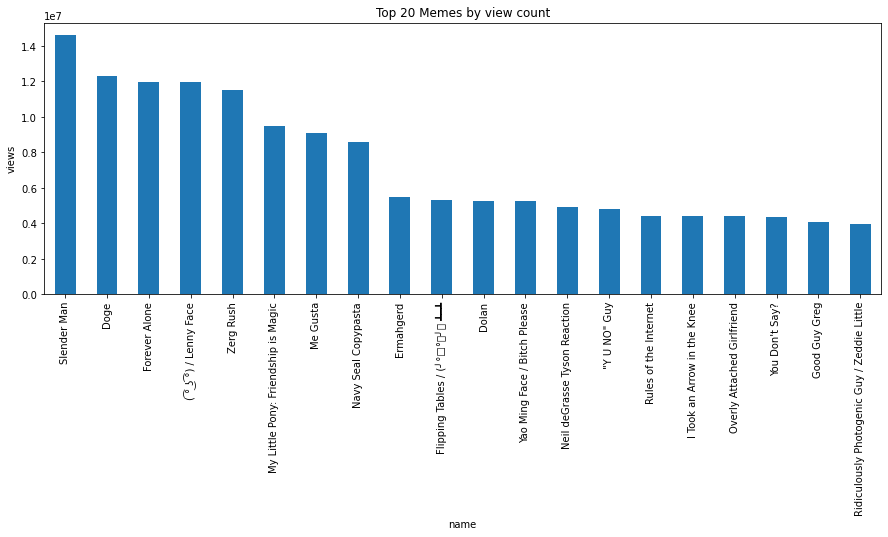

In [23]:
# Plot the data
plot_2 = df.sort_values('views', ascending=False).head(20).plot(x='name', y='views', kind='bar')
plot_2.set_ylabel('views')
plot_2.get_legend().remove()
plot_2.set_title('Top 20 Memes by view count')

Next, let us look at how memes are distributed in terms of their status:

Text(0.5, 1.0, 'Number of memes by status')

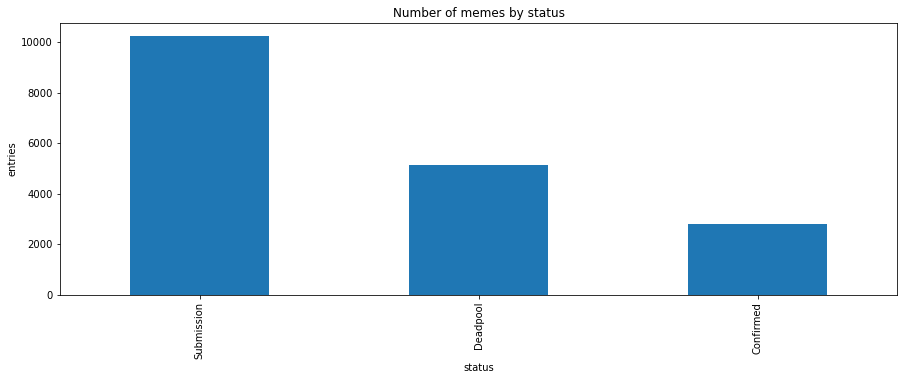

In [24]:
plot_3 = df.groupby(['status'])['views'].count().plot(x='status', y='views', kind='bar')
plot_3.set_ylabel('entries')
plot_3.set_title('Number of memes by status')

As we can see, most of the memes have pending status - 'Submission', and the number of rejected memes ('Deadpool') is pretty high. The "confirmed" group is the smallest one among the three, but how does this correspond in terms of view numbers? Let us check it:

Text(0.5, 1.0, 'Meme views by status')

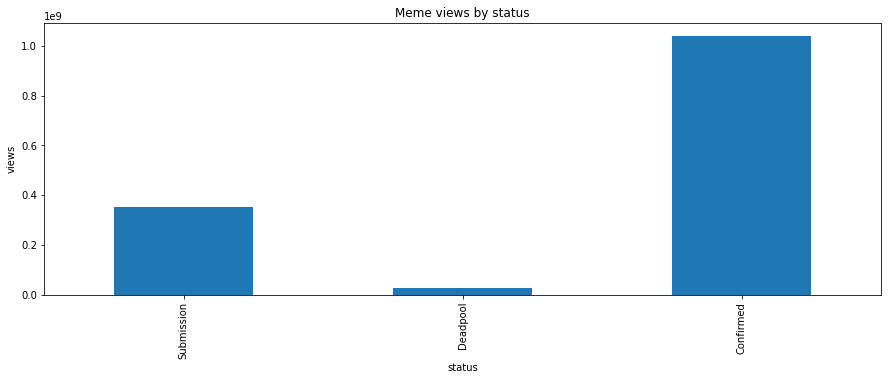

In [25]:
plot_4 = df.groupby(['status'])['views'].sum().plot(x='status', y='views', kind='bar')
plot_4.set_ylabel('views')
plot_4.set_xticklabels(plot_4.get_xticklabels(), rotation=90)
plot_4.set_title('Meme views by status')

The picture changes drastically: confirmed memes contribute 73% of the views, while the rejected memes contribute less than 2%. As I see it: the meme start to gain popularity only after it had been confirmed by the community.
<br><br>Next I want to analyze the data in terms of type. First, I want to sort the data in terms of entries based on the type and then visualize them, to better understand the distribution:

Text(0.5, 1.0, 'Number of entries by type')

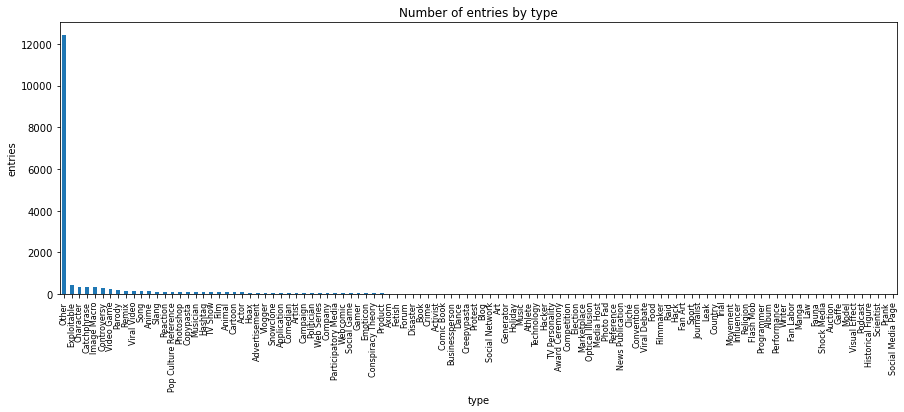

In [26]:
type_entries = df.groupby('type')['views'].count().sort_values(ascending=False)
plot_5 = type_entries.plot(x='name', y='views', kind='bar')
plot_5.set_ylabel('entries')
plot_5.tick_params(axis='x', labelsize=8)
plot_5.set_title('Number of entries by type')

As you can see, one tag towers over all others - that happened when we filled n/a values. It means that most of the meme entries don't have any type at all. Let dive deeper, ignore this 'Other' category, and check the next top 10 most frequently seen types:

Text(0.5, 1.0, 'Top 10 number of entries by type, ignoring the "other"')

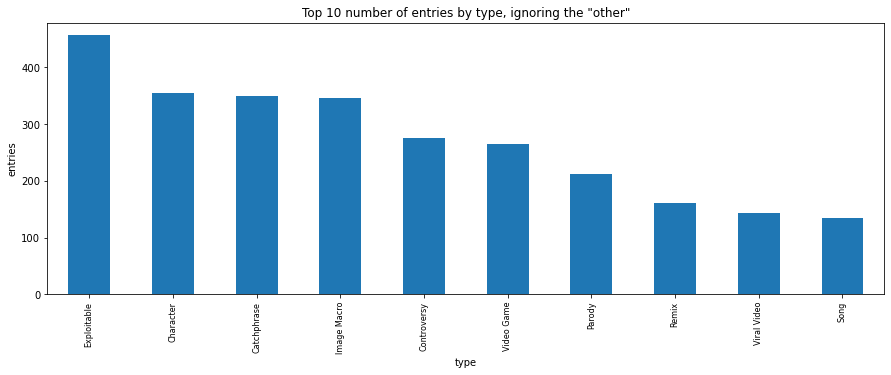

In [27]:
type_entries = type_entries.iloc[1:].head(10)
plot_5 = type_entries.plot(x='name', y='views', kind='bar')
plot_5.set_ylabel('entries')
plot_5.tick_params(axis='x', labelsize=8)
plot_5.set_title('Top 10 number of entries by type, ignoring the "other"')

And now, let us compare it based on the view count and compare how their correlate:

Text(0.5, 1.0, 'Number of views by type, ignoring the "other"')

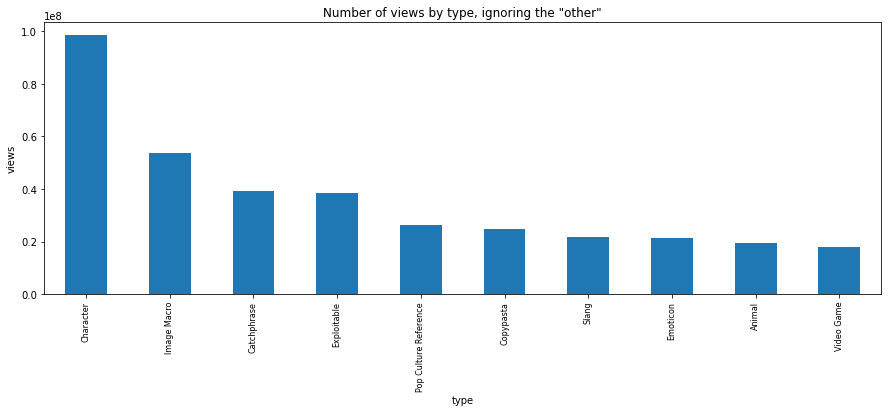

In [28]:
type_views = df.groupby('type')['views'].sum().sort_values(ascending=False)
plot_6 = type_views.iloc[1:].head(10).plot(x='name', y='views', kind='bar')
plot_6.set_ylabel('views')
plot_6.tick_params(axis='x', labelsize=8)
plot_6.set_title('Number of views by type, ignoring the "other"')

Looks like the most frequent meme type ('Exploitable') doesn't generate views very well. And vice versa, some less regular types are more popular than others. The same way I analyze the origin_year:

Text(0.5, 1.0, 'Entries by origin year')

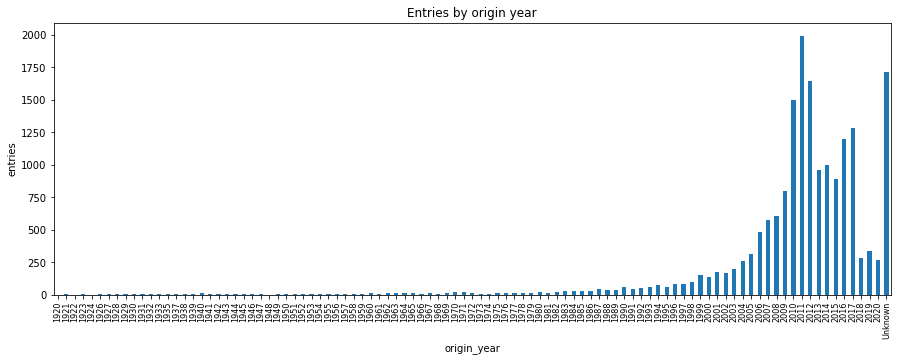

In [29]:
orig_year = df.groupby('origin_year')['views'].count()
plot_7 = orig_year.plot(x='year of origin', y='views', kind='bar')
plot_7.set_ylabel('entries')
plot_7.tick_params(axis='x', labelsize=8)
plot_7.set_title('Entries by origin year')

As expected, most of the meme entries originated in the last 20 years. But the problem is, there are a lot of memes that we can't track to their origin period. Let's now look at how this holds in terms of view count.

Text(0.5, 1.0, 'Views by origin year')

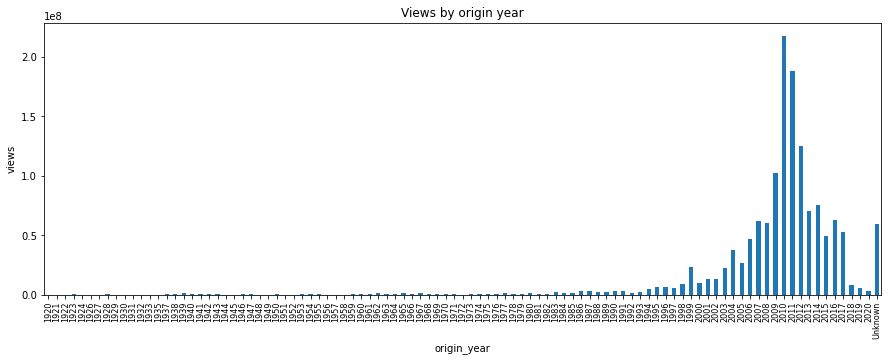

In [30]:
year_views = df.groupby('origin_year')['views'].sum()
plot_8 = year_views.plot(x='year of origin', y='views', kind='bar')
plot_8.set_ylabel('views')
plot_8.tick_params(axis='x', labelsize=8)
plot_8.set_title('Views by origin year')

Most popular memes originated between 2009 and 2013. The trend itself originated in 1996 and reached its peak popularity around 2010. Sometimes this period is characterized as the "golden era" of internet memes, for example, the "Know your meme" originated in 2011. This period created mostly original content that wasn't yet forced by different groups and subcultures and rose to popularity naturally. This plot illustrates this assumption pretty well.
<br><br>Now, as we checked the origin dates, let's move to the submissions. Some memes originated long before the internet memes became a thing or even before the internet itself. We looked at the entry distribution early (output of cell 18), but let's check is there any connection between the date added and the views?

Text(0.5, 1.0, 'Views by date added')

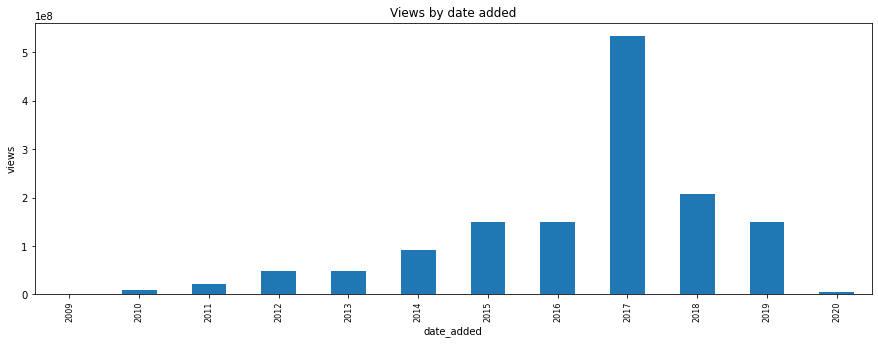

In [31]:
added_views = df.groupby(df['date_added'].dt.year)['views'].sum()
plot_9 = added_views.plot(x='date_added', y='views', kind='bar')
plot_9.set_ylabel('views')
plot_9.tick_params(axis='x', labelsize=8)
plot_9.set_title('')
plot_9.set_title('Views by date added')

Interestingly enough, the biggest chunk of all views comes from the memes that were added in 2017. Combine this information with the results from the previous plot and we can assume that most memes were added to the web database with a huge delay.
<br><br> We already checked the most popular memes in terms of views, but what about additional content that memes generate? Let us check the top 20 memes in terms of user videos, photos, and comments:

Text(0.5, 1.0, 'Top 20 popular Memes in terms of videos, photos and comments')

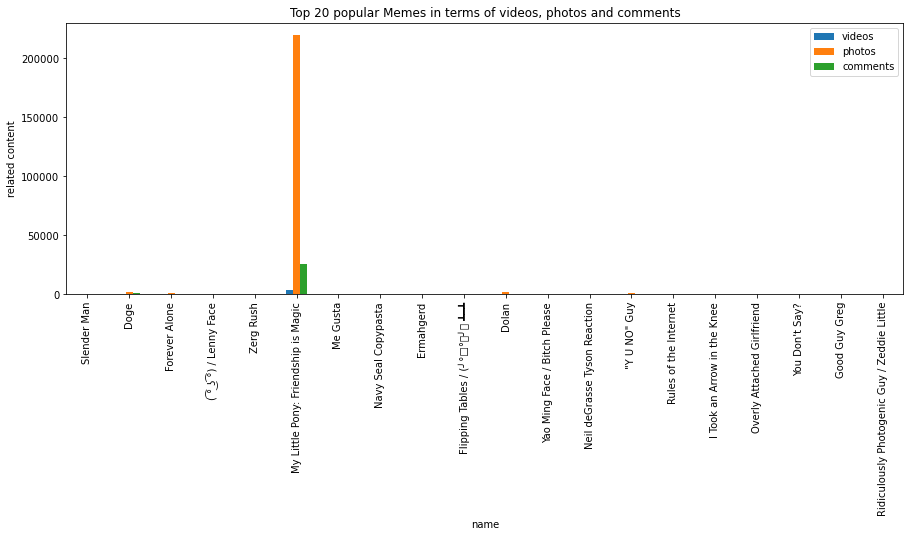

In [32]:
content = df.sort_values('views', ascending=False)
plot_10 = content.head(20).plot(x='name', y=['videos','photos','comments'], kind='bar')
plot_10.set_ylabel('related content')
plot_10.set_title('Top 20 popular Memes in terms of videos, photos and comments')

Surprisingly, one entry dwarfs all other memes in the top 20. Let us now check how it compares to other memes that are popular in terms of user content:

Text(0.5, 1.0, 'Top 20 memes in terms of videos, photos and comments')

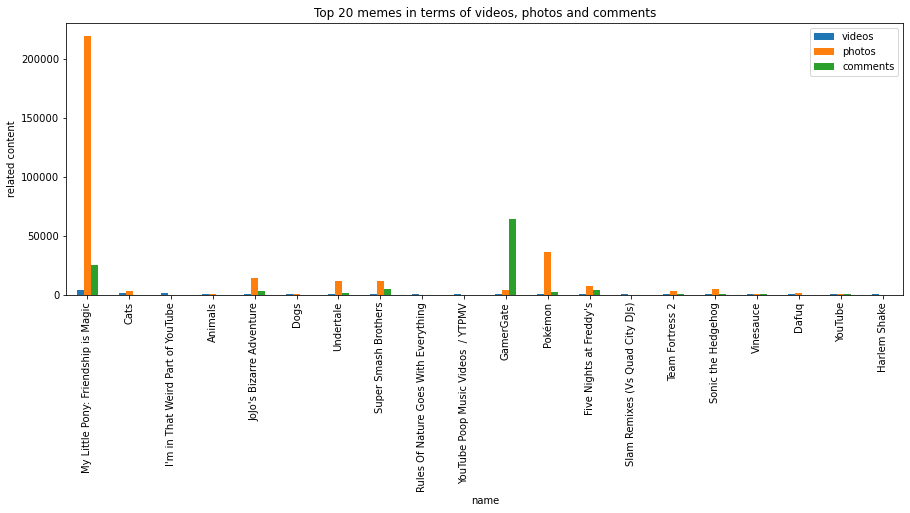

In [33]:
content2 = df.sort_values(['videos','photos','comments'], ascending=[False,False,False])
plot_11 = content2.head(20).plot(x='name', y=['videos','photos','comments'], kind='bar')
plot_11.set_ylabel('related content')
plot_11.set_title('Top 20 memes in terms of videos, photos and comments')

Even here, the first one is dominating others in terms of photos (images) and leads in terms of videos. But the most commented meme is a different one. But despite several popular memes, others even among the top20 are less stacked in user content.
<br><br>Now, we move to the last two columns - tags and about. But before the visualization, we should get meaningful data. First, from the column of tags I want to find the list of tags that show up frequently. I decided to categorize the tag as popular if it shows up more than 10 times:

In [34]:
# Create the list of tags, then select all tags that show up frequently and create the list
tags = pd.Series([val for list in df['tags'] for val in list]).value_counts()
popular_tags = tags.gt(10)
popular_tags = popular_tags.loc[popular_tags == True].index.to_list()

Now, let us check-up, what are the most popular words from this list:

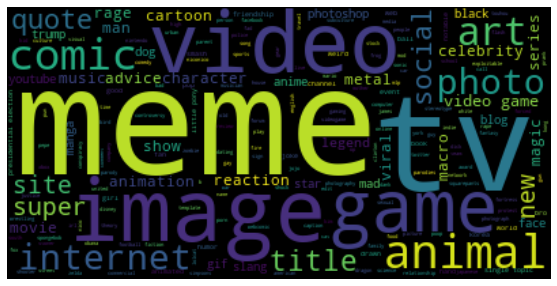

In [35]:
# Create the wordcloud from the list of popular tags 
tagcloud = WordCloud().generate(' '.join(popular_tags))
plt.imshow(tagcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Later, I will check the effect of these tags on the view count. But before that, let's analyze the column that stores short meme explanations and look up the popular words from the about column:

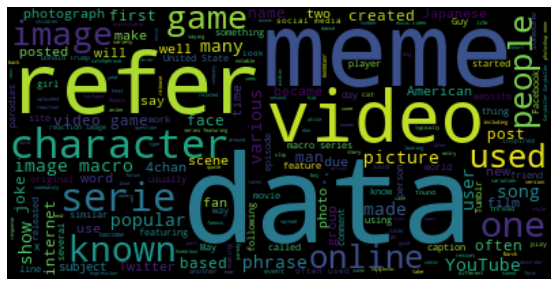

In [36]:
# Because the apostrophe mark is already in the stop words, I add several contractions to prevent them from showing up   
STOPWORDS.update(['s','t','ve'])
# Generate the wordcloud
aboutcloud = WordCloud().generate(' '.join(df['about']))
plt.imshow(aboutcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Interestingly enough, a lot of words are present in both lists - 'meme', 'image', 'video', 'game', etc. But the question remains - "Is there any correlation between certain tags, words (and other factors), and the view count?". I will try to explore this next?

# 4. Popularity analysis
## 4.1 Data processing pipeline
Let me start by explaining a little bit about how I plan to analyze the data. The main idea is to find what factors that affect the popularity of the meme entry. To measure the popularity of the meme I use the views number. And to explore the correlation between different factors and the viewer count I decided to use linear regression analysis. So in my model, the view count is the dependent variable, and the tested factor is the predictor (independent) variable. But the problem is - not all factors are easy to evaluate in numerical terms and use for the regression model. Because of this, for some factors, I will try to use some tricks to either make them suitable for this type of analysis or find another way to analyze them and find come possible link. 
<br>I will be testing the assumption that there is exist a correlation between different factors and the view count. To make this analysis we make several assumptions: 
1. The relation between the view count and each tested factor is linear – we assume that a change in factor value creates the same change in the view count.
2. There is no auto correlation (value doesn't depend upon its previous values) – our dataset is not a time series, so there is a negligible chance of autocorrelation.
3. There is no multicollinearity (when the model analyzes the effect of several different factors, there is a risk that these factors are interdependent) – we will test correlation pairwise, so we have only one independent factor.
4. There is no heteroskedasticity (when series variance changes over a range of measures) - if my findings will find any potential correlation, I will test distribution variance using scatter plots. Heteroskedasticity can be identified by the cone shape of the residuals.
5. Normal distribution of the data (when the data is spread out 'evenly' and follows Gaussian distribution) – the size of my data is big enough to make this assumption.
<br><br>Another thing I must note before the analysis is that there are different 'methods' of the correlation analysis: Pearson, Spearman, and Kendall. They all have their uses: Pearson correlation is suitable when we measure the correlation between the numeric variables, while the Spearman and Kendall are better suited for ordinal (categorical) variables. Different factors require different methods and I will use both. I plan to analyze two datasets - one that will consist of factors that can be expressed numerically and another one that stores categorical data. I plan to use the Pearson correlation for the first one, and the Spearman correlation for the second one [15].  

## 4.2 Preparing datasets
Let's start the work on the correlation by preparing the datasets for the analysis. I start by checking current datatypes:

In [37]:
print(df.dtypes)

name                         object
status                     category
type                       category
origin_year                category
origin_place               category
date_added      datetime64[ns, UTC]
views                         int64
videos                        int64
photos                        int64
comments                      int64
tags                         object
about                        object
dtype: object


Now to divide the data into 2 categories:
1. I can't find any correlation between the name and the view count because this column stores unique values, but I plan to substitute this column for something handier. I will check not the name itself, but the length of the name. To do it, I need to create a column that stores the length of each meme. To save the original data I will copy names columns, and all other numerical columns (views, videos, photos) and add new columns later:

In [38]:
# Create the dataframe that stores 'numerical' factors
df2 = df[['name','views','videos','photos','comments']].copy()

# Add the column that stores the memes name length
df2['name_len'] = df2['name'].map(lambda val: len(val))

2. Columns that store category data will be used in the second dataset, but the problem is, that the categories themselves are just pieces of text. And it's hard to calculate something with a text, but to deal with it we can factorize the categorical data. So we attribute a code to each status and try to find a correlation using this number. 
<br>But before I do it, we need to address the issue that was identified when we visualized category columns early. I talk about the columns that store entries without invalid values. Most of the values from the column 'type' is set to "Other" and a big chunk of data from column 'origin_year' is also set to "Unknown". Before I add codes of 'status', 'type', 'origin_year', and 'origin_place' columns to this new dataset, I need to filter out entries that hold these values.

In [39]:
# Prepare the filtered dataframe
filtered = df[(df['type'] != 'Other') & (df['origin_year'] != 'Unknown')]

# Create the dataframe that stores name and views, then add categorical factors (as codes)
df3 = filtered[['name','views']].copy()
df3['status'] = filtered['status'].cat.codes
df3['type'] = filtered['type'].cat.codes
df3['origin_year'] = filtered['origin_year'].cat.codes
df3['origin_place'] = filtered['origin_place'].cat.codes

3. Next column stores data of the "DateTime" type. It's not a numeric value and not a category, so how do we calculate the correlation? The little trick I use - cast the values to int using the fact that each date can be expressed as a number of seconds from some base DateTime. So my next step is to add the date in numeric format to the first dataset:

In [40]:
df2['date_added'] = pd.to_numeric(df['date_added'])

4. I talked before about the tag columns and the problem it presents. It contains not just a string, but a list of strings. Because of it, I cant use the same approach as I did with categorical data. I decided to use a different approach - create a column that is equal to "1" if the meme entry includes at least one of the popular tags, and "0" otherwise. To do this I use a helper function that I will apply to each entry. And another thing I need to notice is because our second dataset was filtered it only has around 5000 entries, and the number of tags that we check is above 1000, so I risk an error if I only check this filtered dataset, so for this correlation, I prepare another dataset:

In [41]:
# Helper function to check that entry include a popular tag
def hasValues(row, colName, _list):
    for tag in row[colName]:
        if tag in _list:
            return 1
    return 0

# Create the dataframe that stores name and views for the tag analysis
df4 = df[['name','views']].copy()
# Add the column to the categorical dataset
df4['has_popular_tag'] = df.apply(hasValues, colName='tags', _list=popular_tags, axis = 1)

5. The last factor that we need to test is stored in the 'about' column. I decided to check it in two ways: the first one - is to check the correlation between the length of the explanation and the view count, and another one is to check if the explanation contains one of the popular words:

In [42]:
# Add "about length" column to the first dataframe and the "has popular word" to the third one
df2['about_len'] = df['about'].map(lambda val: len(val))
df4['has_popular_word'] = df.apply(hasValues, colName='about', _list=list(aboutcloud.words_.keys()), axis = 1)

Now that we finished preparing 3 datasets for the correlation, let us proceed to the final step.

## 4.3  Regression analysis
Let's analyze the correlation between numerical factors first, as I said before, we use Pearson (default) correlation. For better representation I will visualize the correlation data using a heatmap:

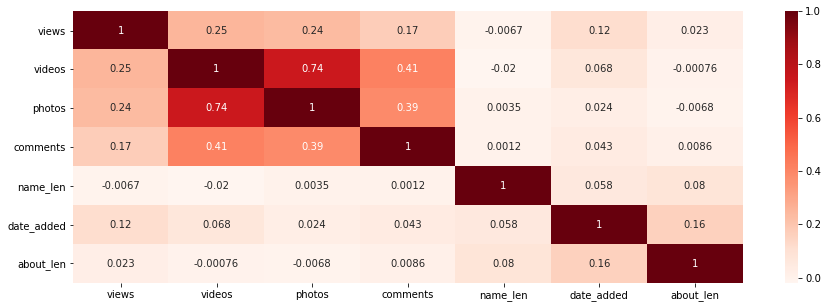

In [43]:
sns.heatmap(df2.corr(), annot=True, cmap="Reds")

* First of all, I can say that there are a weak pairwise correlation between the numbers videos, photos and views. 
* Another interesting info is that there are strong correlation between the custom content values - videos, photos and comments.
* Latsly - the length of the name, date added and the length of the about description doesn't correlate with any other factor.
<br><br>Next, I check the Spearman correlation between the views and other categorical values: 

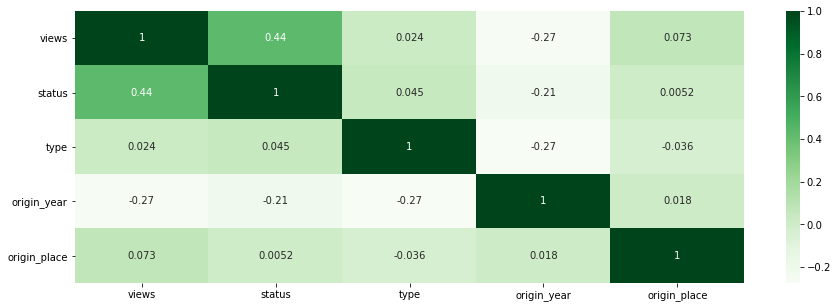

In [44]:
sns.heatmap(df3.corr(method='spearman'), annot=True, cmap="Greens")

* There is a medium positive correlation between the status category of the meme and the number of views;
* Also, there is a weak negative correlation between the date the meme was added and the number of views;
* Interestingly enough there are weak negative pairwise correlations between the year of status category, type category, and the year of origin.
<br><br> Finally, let us check the Spearman correlation between the presence of the "popular" tags, "popular" words, and the number of views:

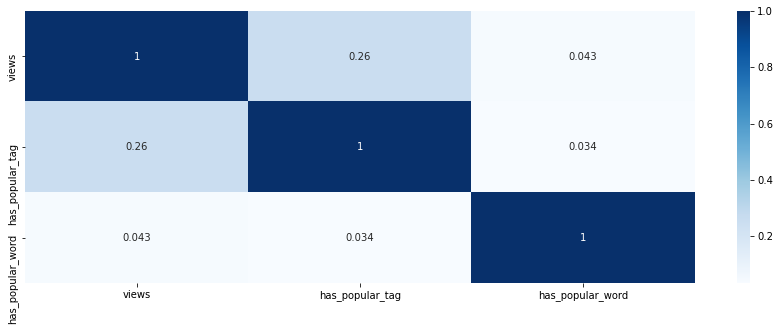

In [45]:
sns.heatmap(df4.corr(method='spearman'), annot=True, cmap="Blues")

There is only a weak correlation between the presence of the popular tags and the number of views and nothing else.

# 5. Summary
## 5.1 Conclusions
Analyzing the meme data I found some correlation between the number of views and other factors like status, origin year, number of videos, photos, comments, and presence of certain tags. This research also uncovered interesting trends in internet memes.
<br>But these findings are in no way a complete analysis. I was only able to prove that there is some correlation between certain factors and popularity but didn't check which factors are linked to bigger view numbers. I also have a lot of doubt that this analysis has no errors in terms of statistical science, so I would like to try to re-do this research after completing some basic statistics courses. 
<br> In the future I would like to dive a little deeper and try to analyze the meme's content, not only metadata. There is a good opportunity to use machine learning methods to create a model that will be able to recognize pictures and identify the memes.
## 5.2 Data summary
I created and used 4 data frames in the course of this work:
1. Original data frame contains cleaned-up information about the memes. It can be used to identify and analyze different memes: 

In [46]:
df.columns

Index(['name', 'status', 'type', 'origin_year', 'origin_place', 'date_added',
       'views', 'videos', 'photos', 'comments', 'tags', 'about'],
      dtype='object')

2. Dataframe №2 that contains numerical data about the memes. It can be used to analyze Pearson correlation between views, videos, photos, comments, submission date, and lengths of the memes name and description:

In [47]:
df2.columns

Index(['name', 'views', 'videos', 'photos', 'comments', 'name_len',
       'date_added', 'about_len'],
      dtype='object')

3. Dataframe №3 includes codes of the categorical characteristics of the memes. Can be used to calculate Spearman correlation coefficients between the number of views and status category, type category, type, and year and place of meme origin:

In [48]:
df3.columns

Index(['name', 'views', 'status', 'type', 'origin_year', 'origin_place'], dtype='object')

4. Dataframe №4 stores boolean values that contain information about the presence of certain tags and words. It can be used to find the correlation between these variables and the popularity of the memes:

In [49]:
df4.columns

Index(['name', 'views', 'has_popular_tag', 'has_popular_word'], dtype='object')

5. Two lists containing information about popular tags and description words. This data can be used to explore how certain words explain popularity:

In [50]:
popular_tags = list(tagcloud.words_.keys())
popular_words = list(aboutcloud.words_.keys())

# 6. References and Resources
1. Quote attributed to Heraclitus [Online]. Available: https://en.wikiquote.org/wiki/Heraclitus
2. Oxford dictionary [Online]. Available: https://www.oxfordlearnersdictionaries.com/definition/english/meme
3. Holland, Charlotte. (2020). Just a Joke? The Social Impact of Internet Memes. 10.13140/RG.2.2.17476.04485 [Online]. Available: https://www.researchgate.net/publication/341738736_Just_a_Joke_The_Social_Impact_of_Internet_Memes
4. Zannettou, Savvas & Caulfield, Tristan & Blackburn, Jeremy & De Cristofaro, Emiliano & Sirivianos, Michael & Stringhini, Gianluca & Suarez-Tangil, Guillermo. (2018). On the Origins of Memes by Means of Fringe Web Communities [Online]. Available: https://www.researchgate.net/publication/329237247_On_the_Origins_of_Memes_by_Means_of_Fringe_Web_Communities
5. Abisheva, Adiya & Garimella, Venkata & Garcia, David & Weber, Ingmar. (2013). Who Watches (and Shares) What on YouTube? And When? Using Twitter to Understand YouTube Viewership. WSDM 2014 - Proceedings of the 7th ACM International Conference on Web Search and Data Mining. 10.1145/2556195.2566588 [Online]. Available: https://www.researchgate.net/publication/259313154_Who_Watches_and_Shares_What_on_YouTube_And_When_Using_Twitter_to_Understand_YouTube_Viewership 
6. Sobande, Francesca. (2019). Memes, digital remix culture and (re)mediating British politics and public life. IPPR Progressive Review. 26. 10.1111/newe.12155 [Online]. Available: https://www.researchgate.net/publication/334856325_Memes_digital_remix_culture_and_remediating_British_politics_and_public_life
7. Williams, Amanda & Oliver, Clio & Aumer, Katherine & Meyers, Chanel. (2016). Racial microaggressions and perceptions of Internet memes. Computers in Human Behavior. 63. 424-432. 10.1016/j.chb.2016.05.067 [Online]. Available: http://amandawilliams.ca/papers/Racial%20microaggressions%20and%20perceptions%20of%20Internet%20memes.pdf
8. Cox, Krista. (2017). Metadata and Copyright: Should Institutions License Their Data about Scholarship? [Online]. Available: https://digitalcommons.unl.edu/cgi/viewcontent.cgi?article=1060&context=scholcom
9. Know Your Meme, accessed 20 June 2022, <https://knowyourmeme.com/>
10. Memebase, accessed 20 June 2022, <https://memebase.cheezburger.com/>
11. Imgflip, accessed 20 June 2022, <https://imgflip.com/>
12. A lot of info & stats about memes, accessed 20 June 2022, <https://www.kaggle.com/datasets/podsyp/a-lot-of-memes-info-stats>
13. Atsumi Kyoko, Dealing with Large Datasets: the Present Conundrum, 14 Aug 2021, accessed 20 June 2022, <https://towardsdatascience.com/title-86a91890b5c6>
14. DATA MANAGEMENT: INTELLECTUAL PROPERTY AND COPYRIGHT, accessed 20 June 2022, <https://libguides.library.kent.edu/data-management/copyright>
15. Juhi Ramzai, Clearly explained: Pearson V/S Spearman Correlation Coefficient, 25 Jun 2020, accessed 20 June 2022, <https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8>